In [1]:
from __future__ import print_function
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense,Embedding
from keras.layers import LSTM
from keras.datasets import imdb # 文本分类数据集

Using TensorFlow backend.


In [2]:
# 参数设置
max_features=20000
max_len=80 # 文本最大长度
batch_size=32

In [3]:
# 加载数据
print("loading data...")
(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=max_features)
print(len(X_train),"train sequences")
print(len(X_test),"test sequences")

loading data...
25000 train sequences
25000 test sequences


In [10]:
y_train

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [9]:
print("Pad sequences") # 填充
X_train=sequence.pad_sequences(X_train,maxlen=max_len)
X_test=sequence.pad_sequences(X_test,maxlen=max_len)
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
# 建立模型
print("Build model...")
model=Sequential()
model.add(Embedding(max_features,128))
model.add(LSTM(128,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


Pad sequences
X_train shape: (25000, 80)
X_test shape: (25000, 80)
Build model...


In [ ]:
# 训练模型
print("Train...")
model.fit(X_train,y_train,
          batch_size=batch_size,
          epochs=15,
          verbose=1,
          validation_data=(X_test,y_test))

score,acc=model.evaluate(X_test,y_test,batch_size=batch_size,verbose=0)
print("Test score:",score)
print("Test accuracy:",acc)

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/15
 5472/25000 [=====>........................] - ETA: 1:13 - loss: 0.5697 - acc: 0.6923

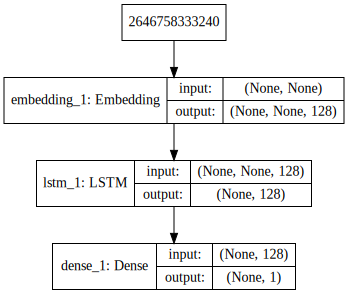

In [11]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))